## Discover and visualization of the dataset

In [122]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
import pylab
import random as random
from pandas.api.types import CategoricalDtype


In [123]:
data_set= pd.read_csv("salary_datasett\DatasetSalary.csv")
df=data_set.copy()   #veri setinin kopyasını aldık ki bir hata yaparsak veri setimiz etkilenmesin.

In [124]:
df.shape #veri setimiz 16534 satır ve 11 sütundan/özellikten meydana gelmekte)

(16534, 11)

In [323]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### Eksik değer var mı?

In [126]:
df.info() #veri setinde null bir değer yok. 
#burada object olan değişkenler kategoriğe çevirilecek.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [127]:
df.dtypes
df.experience_level=pd.Categorical(df.experience_level)
df.employment_type=pd.Categorical(df.employment_type)
df.job_title=pd.Categorical(df.job_title)
df.salary_currency=pd.Categorical(df.salary_currency)
df.employee_residence=pd.Categorical(df.employee_residence)
df.company_location=pd.Categorical(df.company_location)
df.company_size=pd.Categorical(df.company_size)

#bunu yapma sebebimiz object olan değişkenleri kategoriğe çevirmek. böylece veri setimiz daha hızlı ve efektif olabilecek.
#ml algoritmalarında kullanılırsa bu açıdan da kolaylık yaratacak. 

In [128]:
################################### düzenlenecek

In [129]:
stat, p_value = stats.shapiro(df['salary_in_usd'])

print('Test istatistiği:', stat)
print('p-değeri:', p_value)

if p_value > 0.05:
    print("Veri seti normal dağılım gösteriyor (H0 reddedilemez).")
else:
    print("Veri seti normal dağılım göstermiyor (H0 reddedildi).")

Test istatistiği: 0.9275317192077637
p-değeri: 0.0
Veri seti normal dağılım göstermiyor (H0 reddedildi).


C:\Users\meebe\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [130]:
##veri setimiz büyük olduğundan

In [131]:
result = stats.anderson(df['salary_in_usd'], dist='norm')

print('Test istatistiği:', result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'{sl}% seviyesinde: Veri seti normal dağılım gösteriyor (H0 reddedilemez).')
    else:
        print(f'{sl}% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).')


Test istatistiği: 118.29051160753806
15.0% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).
10.0% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).
5.0% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).
2.5% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).
1.0% seviyesinde: Veri seti normal dağılım göstermiyor (H0 reddedildi).


In [132]:
##########################################

### Değişkenleri anlama

In [134]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [329]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [136]:
df.tail()
#Burada 16533. indekse sahip kişi hindistan rupisi ile veri girişi yapmış.
#farklı birimler de araştırmanın içine katılmış. O yüzden ücret ortalaması 
#için "salary_in_usd" değişkenini baz alacağız.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


### Popülasyondaki kişilerin lokasyonu

In [138]:
df["employee_residence"].value_counts(normalize=True)*100
# %87 oranla kişiler Amerika'da yaşamakta

employee_residence
US    87.498488
GB     4.149026
CA     2.739809
ES     0.828596
DE     0.592718
        ...    
KW     0.006048
LU     0.006048
MU     0.006048
MY     0.006048
IR     0.006048
Name: proportion, Length: 88, dtype: float64

In [139]:
df["company_location"].value_counts(normalize=True)*100 
#firmalar da aynı oranlarla kişilerin yaşadığı yerlerde 

company_location
US    87.806943
GB     4.197411
CA     2.751905
ES     0.804403
DE     0.635055
        ...    
IR     0.006048
CL     0.006048
MD     0.006048
OM     0.006048
AD     0.006048
Name: proportion, Length: 77, dtype: float64

In [140]:
df["job_title"].value_counts() #Ayrıca veri setinde 155 farklı poziyona yer verilmiş bu kişilerin hepsi veri ile ilintili alanlarda çalışmakta
#lakin tek bir pozisyon hakkında konuşmak zor olabilir.

job_title
Data Engineer                      3464
Data Scientist                     3314
Data Analyst                       2440
Machine Learning Engineer          1705
Research Scientist                  531
                                   ... 
BI Data Engineer                      1
Data Science Tech Lead                1
Applied Research Scientist            1
Analytics Engineering Manager         1
Staff Machine Learning Engineer       1
Name: count, Length: 155, dtype: int64

In [141]:
df["job_title"].value_counts().head(20) #en çok yer bulan ünvanlar bu şekilde 

job_title
Data Engineer                     3464
Data Scientist                    3314
Data Analyst                      2440
Machine Learning Engineer         1705
Research Scientist                 531
Applied Scientist                  435
Data Architect                     435
Analytics Engineer                 431
Research Engineer                  306
Data Science                       271
Business Intelligence Engineer     248
Data Manager                       212
ML Engineer                        200
Business Intelligence Analyst      191
Machine Learning Scientist         138
Research Analyst                   123
Data Science Manager               122
AI Engineer                        120
Business Intelligence               98
BI Developer                        90
Name: count, dtype: int64

In [142]:
df["job_title"]= df["job_title"].replace("Data Science","Data Scientist")
#Data Science diye bir meslek olmadığından bunların yanlış girmeden kaynaklı olduğu aşikar olduğundan onları Data Scientist tarafına ekliyorum.

In [143]:
df["job_title"].value_counts().head(20)

job_title
Data Scientist                    3585
Data Engineer                     3464
Data Analyst                      2440
Machine Learning Engineer         1705
Research Scientist                 531
Data Architect                     435
Applied Scientist                  435
Analytics Engineer                 431
Research Engineer                  306
Business Intelligence Engineer     248
Data Manager                       212
ML Engineer                        200
Business Intelligence Analyst      191
Machine Learning Scientist         138
Research Analyst                   123
Data Science Manager               122
AI Engineer                        120
Business Intelligence               98
BI Developer                        90
Data Specialist                     86
Name: count, dtype: int64

## Hikayesini bilmediğimiz değişkenleri yorumlama

In [145]:
df.groupby("experience_level")[["salary_in_usd"]].aggregate(["min", "median","mean", "max"])
#veri setini veren kişi junior, mid ve senior şeklinde gruplamış fakat görülüyor ki 
#ex(experienced) olarak tahmin ettiğim bir sınıf var ve medyanı seniordan yüksek. 

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\2957492417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("experience_level")[["salary_in_usd"]].aggregate(["min", "median","mean", "max"])


salary_in_usd                                 
                           min    median           mean     max
experience_level                                               
EN                       15000   83000.0   92327.413585  774000
EX                       15000  192000.0  195264.281437  465000
MI                       15000  115000.0  125923.131253  800000
SE                       15809  155000.0  163662.826148  750000

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


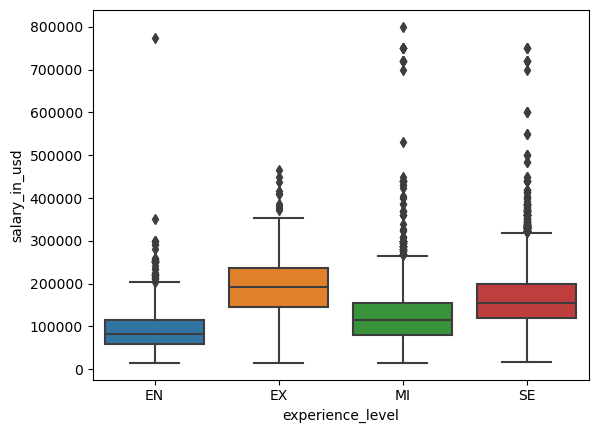

In [146]:
 sns.boxplot(x = "experience_level", y = "salary_in_usd", data = df);


In [147]:
df["experience_level"].value_counts()
#501 adet EX sınıfına sahip gözlemimiz var. EX kategorisinden 
#çok farklı bir etki beklemesem de bunu aklımda tutuyorum veri
#setinin çoğunu Senior kişiler oluşturuyor sektörde en yüksek alanlar onlar olduğundan 
#ortalamayı yukarı çekebileceklerinin farkında olmamız gerekiyor.

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

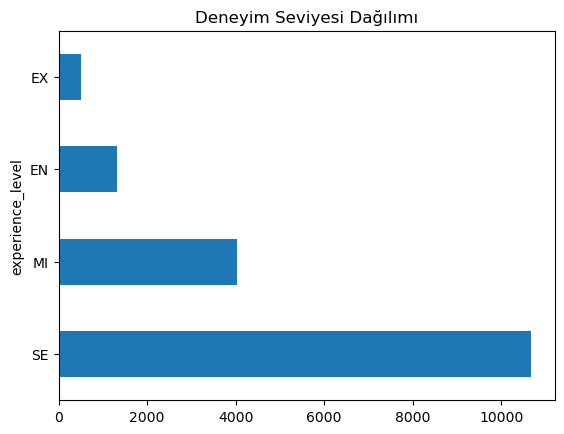

In [148]:
(df["experience_level"]
.value_counts()
.plot.barh()
.set_title("Deneyim Seviyesi Dağılımı"));

In [149]:
df["experience_level"] #Aslında buradaki ünvanlar ordinal lakin veri setine bu yansımamış.

0        SE
1        SE
2        SE
3        SE
4        SE
         ..
16529    SE
16530    MI
16531    EN
16532    EN
16533    SE
Name: experience_level, Length: 16534, dtype: category
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [150]:
ordered_experience = CategoricalDtype(categories = ["EN", "MI", "SE", "EX"], ordered=True)


In [151]:
df["experience_level"] = df["experience_level"].astype(ordered_experience)

In [152]:
df["experience_level"] 

0        SE
1        SE
2        SE
3        SE
4        SE
         ..
16529    SE
16530    MI
16531    EN
16532    EN
16533    SE
Name: experience_level, Length: 16534, dtype: category
Categories (4, object): ['EN' < 'MI' < 'SE' < 'EX']

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


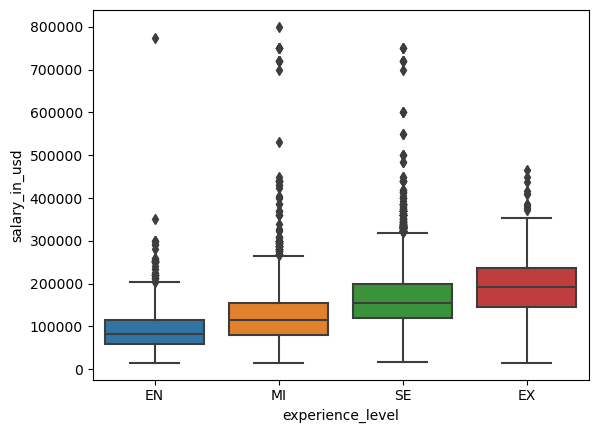

In [153]:
 sns.boxplot(x = "experience_level", y = "salary_in_usd", data = df);


## Aykırı Değerleri değerlendirme

In [155]:
df[(df.salary_in_usd <= 20000.0)]
## İlk başta minimum olan değerler aykırı mı diye emin olamadım ama düşük gelire sahip ülkeler olduğundan
#durumda bir sorun yok. 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
570,2024,EN,FT,Data Analyst,20000,USD,20000,KE,100,KE,M
3518,2024,EN,FT,Data Engineer,17598,USD,17598,MX,50,MX,L
3519,2024,EN,FT,Big Data Engineer,17600,USD,17600,MX,50,MX,L
5739,2024,EN,PT,Data Scientist,15000,EUR,16666,DE,50,DE,M
6870,2023,EN,FT,Data Analyst Lead,18000,USD,18000,NG,100,NG,S
8580,2023,EN,FT,Data Scientist,18000,EUR,19434,GR,100,GR,L
9057,2023,EN,FT,Data Engineer,18000,USD,18000,IN,50,IN,M
9384,2023,MI,FT,Business Data Analyst,17000,USD,17000,AM,100,RU,L
10337,2022,EN,FT,Research Engineer,15662,EUR,16455,RU,100,RU,M
10800,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M


## Değişkenleri Gruplama

In [157]:
kat_df = df.select_dtypes(include = "category")  #kategorik değişenlerin hepsini grupladık
kat_df.head()  

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,AI Engineer,USD,US,US,M
1,SE,FT,AI Engineer,USD,US,US,M
2,SE,FT,Data Engineer,USD,US,US,M
3,SE,FT,Data Engineer,USD,US,US,M
4,SE,FT,Machine Learning Engineer,USD,US,US,M


In [158]:
df_num = df.select_dtypes(include = ["float64","int64"]) #numerik değerlerin tamamını tek bir değişkene toparladık
df_num.head()


,work_year,salary,salary_in_usd,remote_ratio
0,2024,202730,202730,0
1,2024,92118,92118,0
2,2024,130500,130500,0
3,2024,96000,96000,0
4,2024,190000,190000,0


## Değişkenleri Inceleme

In [160]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [161]:
df["work_year"].value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [162]:
df.groupby("work_year")[["salary_in_usd"]].aggregate(["min", "median","mean", "max"])


salary_in_usd                                 
                    min    median           mean     max
work_year                                               
2020              15000   79833.0  102250.866667  450000
2021              15000   83872.0   99922.073394  423000
2022              15000  132000.0  134349.500906  430967
2023              15680  145000.0  153732.664632  750000
2024              16666  140000.0  150564.095269  800000

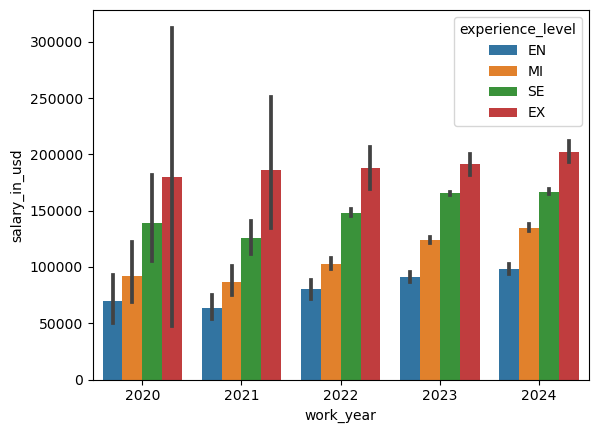

In [163]:
sns.barplot(x = "work_year", y = "salary_in_usd", hue="experience_level",data = df); 
#yıllar ilerledikçe her deneyim seviyesinin ortalama maaşında bir artma gerçekleşmiş 

In [164]:
df.groupby(["experience_level","work_year"])["salary_in_usd"].mean()

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\4111399907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_level","work_year"])["salary_in_usd"].mean()


experience_level  work_year
EN                2020          69840.666667
                  2021          63463.065217
                  2022          80018.698276
                  2023          91166.310345
                  2024          97882.789086
MI                2020          91870.935484
                  2021          86818.390805
                  2022         102745.576602
                  2023         123821.311772
                  2024         134803.995664
SE                2020         138648.894737
                  2021         125989.746667
                  2022         147903.354697
                  2023         165421.026078
                  2024         166815.831737
EX                2020         179958.250000
                  2021         186128.000000
                  2022         188260.292683
                  2023         191314.194215
                  2024         202105.808824
Name: salary_in_usd, dtype: float64

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


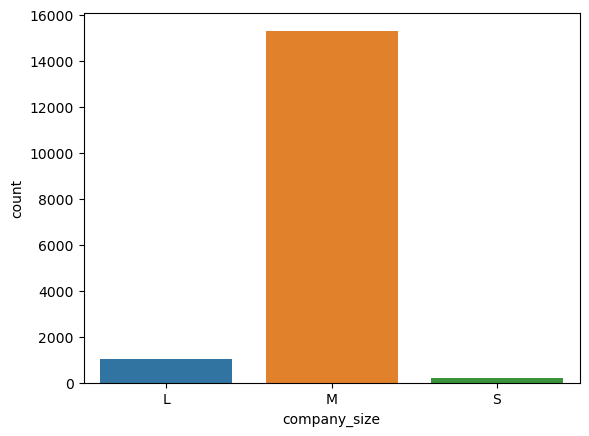

In [165]:
sns.barplot( x = df.company_size.value_counts().index, y=df.company_size.value_counts(), data=df);
#kişilerin çalıştıkları şirketler çoğunlukla orta ölçekli şirketler 

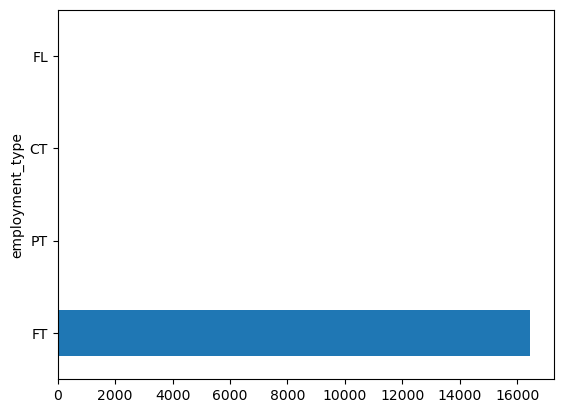

In [166]:
df["employment_type"].value_counts().plot.barh(); #verinin çok büyük bir çoğunluğu full-time çalışanlara ait 

In [167]:
df["employment_type"].value_counts() #lakin diğer çeşitler hiç yok değil grafik bizi yanılgıya düşürüyor bu konuda 

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

## Değişkenlerin Birbiri ile Etkileşimini Görselleştirme

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


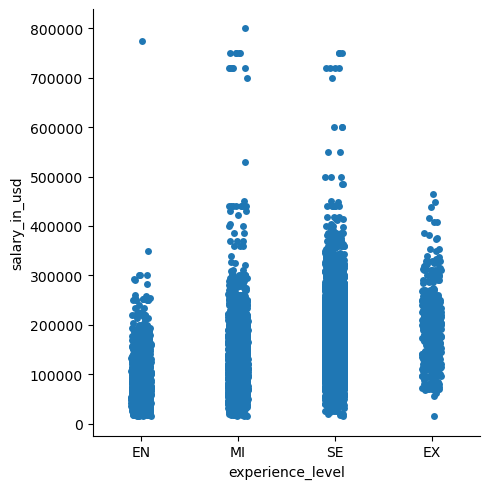

In [168]:
sns.catplot(x = "experience_level", y = "salary_in_usd", data = df); 
#entry seviyesinde görüldüğü gibi 400000 üzerini gören bir değer dışında;(aykırı değer) değer yokken mid ve senior seviyelerinde bu sınır aşılmış. 

In [184]:
stats.skew(df.salary_in_usd)

1.4883023499934345

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\414214566.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.salary_in_usd,
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


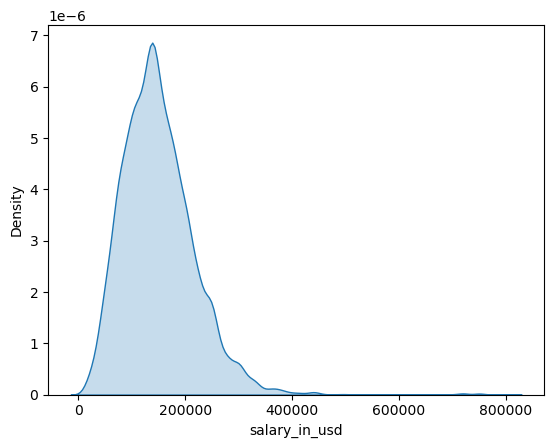

In [178]:
sns.kdeplot(df.salary_in_usd,
        shade= True);


C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

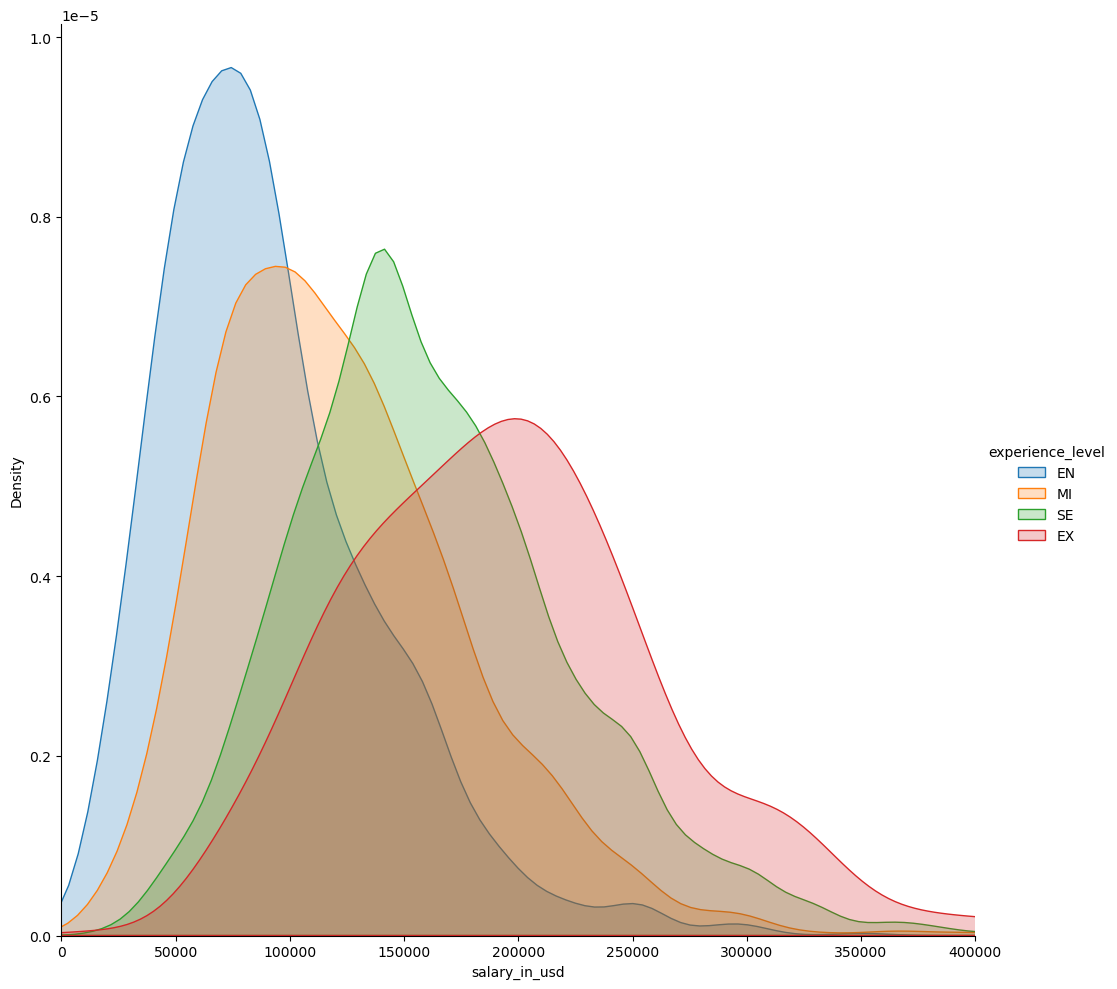

In [169]:
(sns
.FacetGrid(df,
           hue = "experience_level",
           height = 10,
           xlim = (0,400000))
.map(sns.kdeplot, "salary_in_usd", fill = True)
.add_legend()
);

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

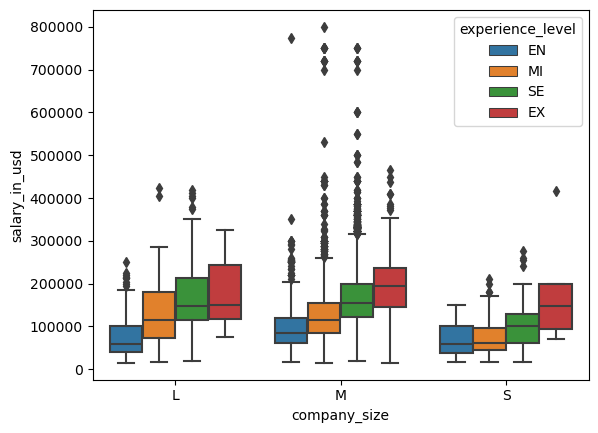

In [183]:
sns.boxplot( x = "company_size", y = "salary_in_usd" ,hue ="experience_level", data = df)

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

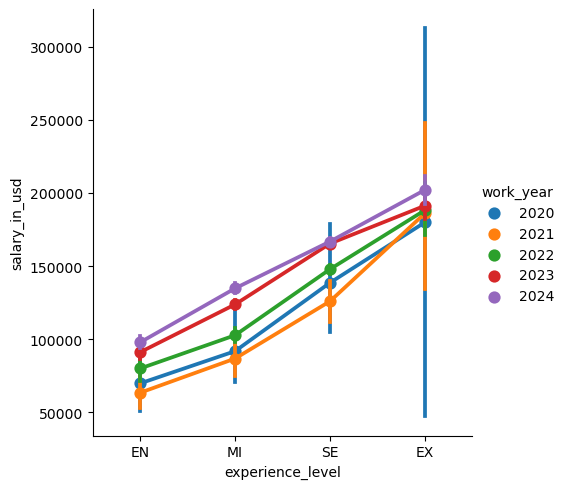

In [288]:
sns.catplot(x = "experience_level", y = "salary_in_usd", hue = "work_year", kind = "point", data = df);

 - Normalde yıldan yıla artması gerekirken neden 2021 senesinde 2020'nin altında bir ortalama gösterdi?
 
Bu konu hakkında araştırma yaptığımda aslında kötü geçen bir sene olmadığını firmaların giderek bu senede covid ile gelen dijitalleşme furyası ile bu alanda daha fazla işe alım yaptığını fark ettim.

Bu düşüklüğün sebebi veri setinin içinde olmalı.

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

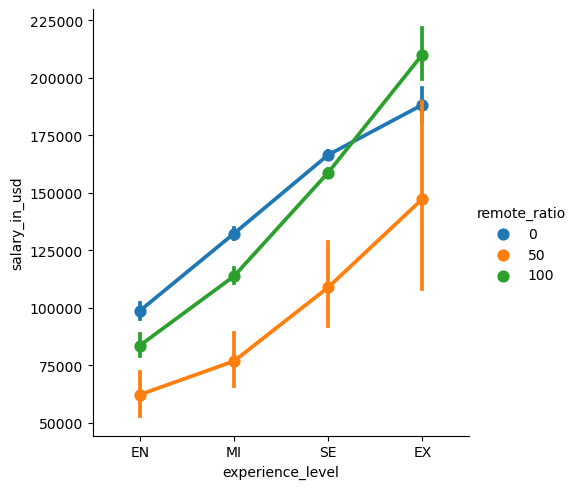

In [173]:
sns.catplot(x = "experience_level", y = "salary_in_usd", hue = "remote_ratio", kind = "point", data = df);

In [175]:
df.groupby("experience_level")["remote_ratio"].value_counts()
#fakat burada anlıyoruz ki bu kişilere dair veri sayısı çok az yorum yapmak çok da doğru olmayabilir.

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\2409848413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("experience_level")["remote_ratio"].value_counts()


experience_level  remote_ratio
EN                0                874
                  100              371
                  50                80
MI                0               2829
                  100             1113
                  50                96
SE                0               7099
                  100             3507
                  50                64
EX                0                316
                  100              176
                  50                 9
Name: count, dtype: int64

In [ ]:
df["experience_level"].plot.barh(hue= ")

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


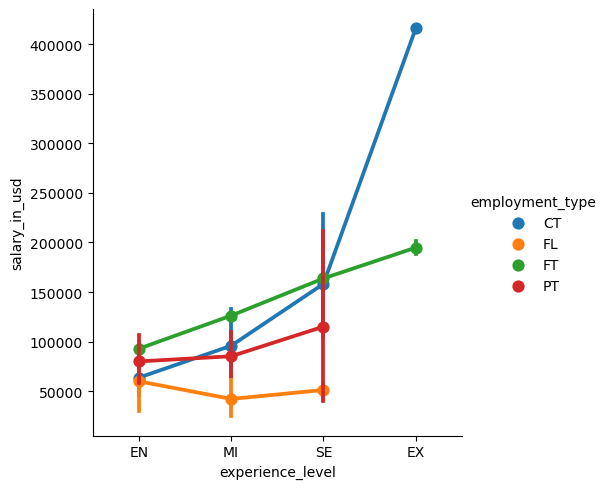

In [315]:
sns.catplot(x = "experience_level", y = "salary_in_usd", hue = "employment_type", kind = "point", data = df);

In [172]:
df.groupby(["experience_level","employment_type"])["salary_in_usd"].mean() 
#bu veriye göre hibrit çalışanlar seviye fark etmeksizin tamamen uzaktan veya tam zamanlı çalışan kişilerden daha düşük alıyorlar.

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\1479477430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_level","employment_type"])["salary_in_usd"].mean()


experience_level  employment_type
EN                CT                  63615.714286
                  FL                  60000.000000
                  FT                  92826.625486
                  PT                  80023.071429
MI                CT                  95824.642857
                  FL                  42179.666667
                  FT                 126224.487908
                  PT                  85222.857143
SE                CT                 158223.333333
                  FL                  51202.800000
                  FT                 163732.329298
                  PT                 115100.000000
EX                CT                 416000.000000
                  FL                           NaN
                  FT                 194822.810000
                  PT                           NaN
Name: salary_in_usd, dtype: float64

- Veri setine göre benzer deneyim seviyesine sahip insanlarda en yüksek maaşa sahip olan kişiler full-time çalışan kişiler.
- Freelance çalışan kişiler ise en düşük seviyeye sahip.
- Veri setinde o 2021'de freelancer sayısında artış olmuş mu kontrol edelim.

In [319]:
df.groupby(["work_year","employment_type"]).size() 

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\4186849637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["work_year","employment_type"]).size()


work_year  employment_type
2020       CT                    3
           FL                    1
           FT                   69
           PT                    2
2021       CT                    3
           FL                    3
           FT                  208
           PT                    4
2022       CT                    4
           FL                    4
           FT                 1641
           PT                    6
2023       CT                    9
           FL                    4
           FT                 8503
           PT                    3
2024       CT                    9
           FL                    2
           FT                 6033
           PT                   23
dtype: int64

In [298]:
df.groupby(["work_year","remote_ratio"]).size() 

work_year  remote_ratio
2020       0                 18
           50                21
           100               36
2021       0                 29
           50                73
           100              116
2022       0                709
           50                61
           100              885
2023       0               5775
           50                72
           100             2672
2024       0               4587
           50                22
           100             1458
dtype: int64

- 2021'de uzaktan ve freelance çalışan kişi sayısı full-time'lara göre daha fazla oranla artmış sebep bu olabilir

In [268]:
df.groupby(["experience_level","work_year"])["salary_in_usd"].mean()

C:\Users\meebe\AppData\Local\Temp\ipykernel_3120\4111399907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_level","work_year"])["salary_in_usd"].mean()


experience_level  work_year
EN                2020          69840.666667
                  2021          63463.065217
                  2022          80018.698276
                  2023          91166.310345
                  2024          97882.789086
MI                2020          91870.935484
                  2021          86818.390805
                  2022         102745.576602
                  2023         123821.311772
                  2024         134803.995664
SE                2020         138648.894737
                  2021         125989.746667
                  2022         147903.354697
                  2023         165421.026078
                  2024         166815.831737
EX                2020         179958.250000
                  2021         186128.000000
                  2022         188260.292683
                  2023         191314.194215
                  2024         202105.808824
Name: salary_in_usd, dtype: float64

C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

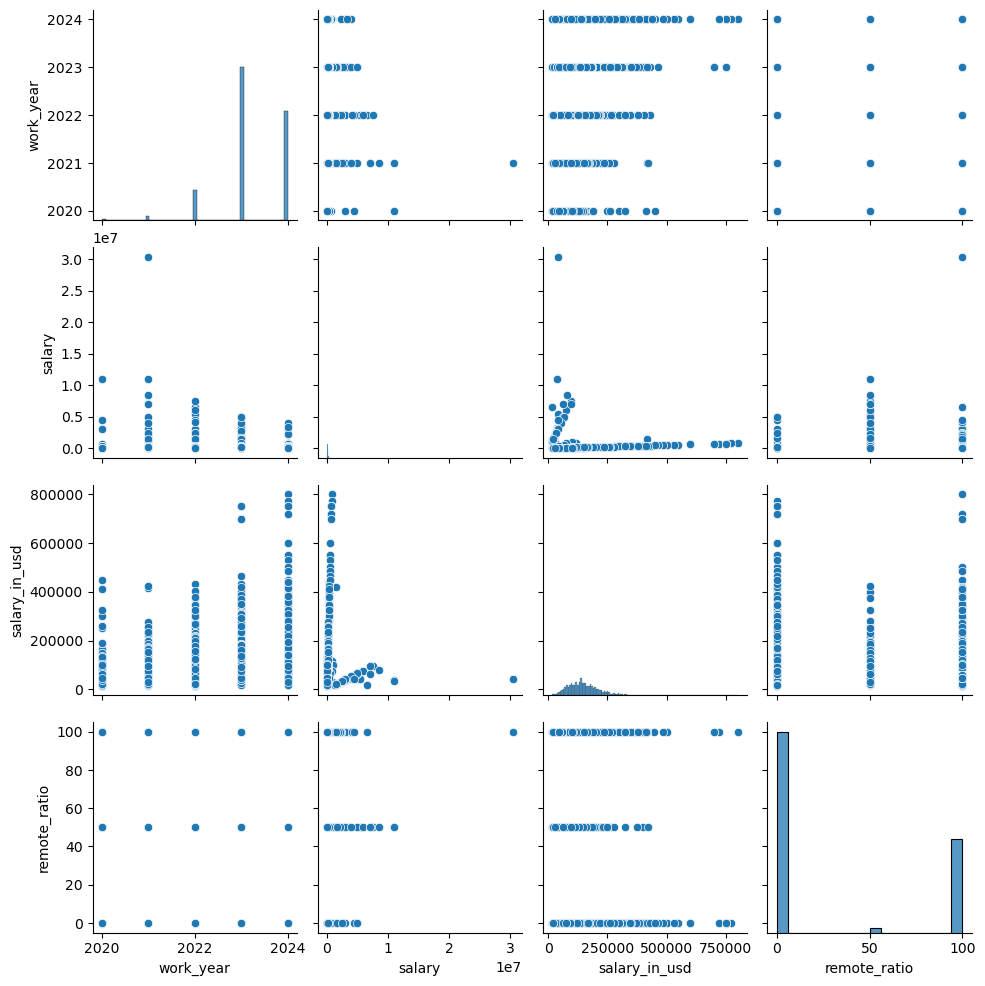

In [270]:
 sns.pairplot(df)